In [140]:
import cv2
import numpy as np
import os
import pytesseract
import matplotlib.pyplot as plt
# pip install pytesseract
import easyocr

In [141]:
# plot images side by side on graphs
def plot_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)
    
    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

In [142]:
path = "./img5.jpg"

In [143]:
image = cv2.imread(path)

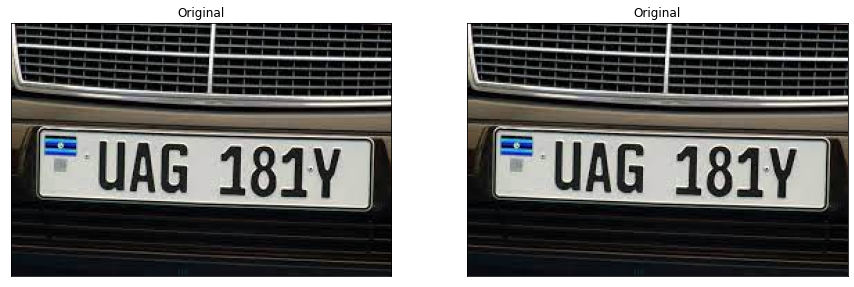

In [144]:
plot_images(image, image, title1="Original", title2="Original")

In [145]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

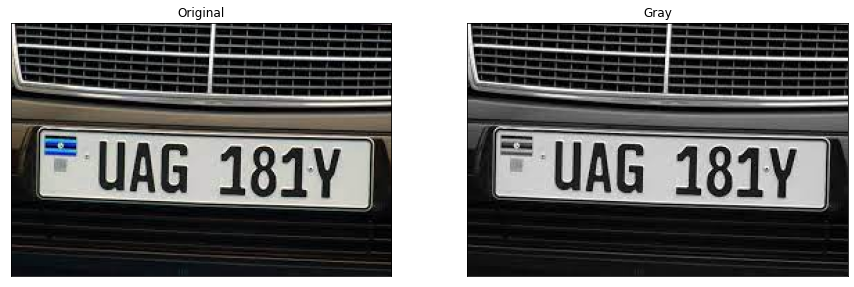

In [146]:
plot_images(image, gray, title1="Original", title2="Gray")

In [147]:
blur = cv2.bilateralFilter(gray, 11, 90, 90)

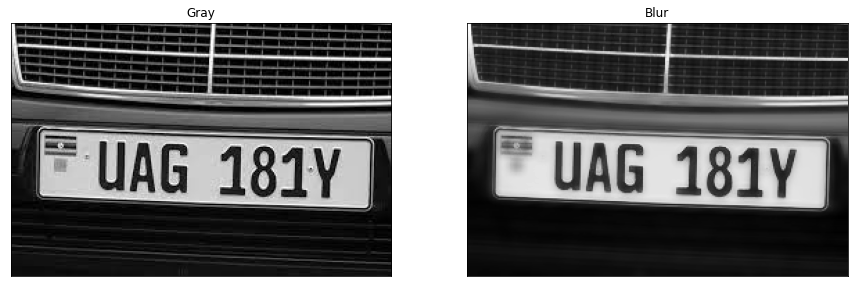

In [148]:
plot_images(gray, blur, title1="Gray", title2="Blur")

In [149]:
edges = cv2.Canny(blur, 30, 200)

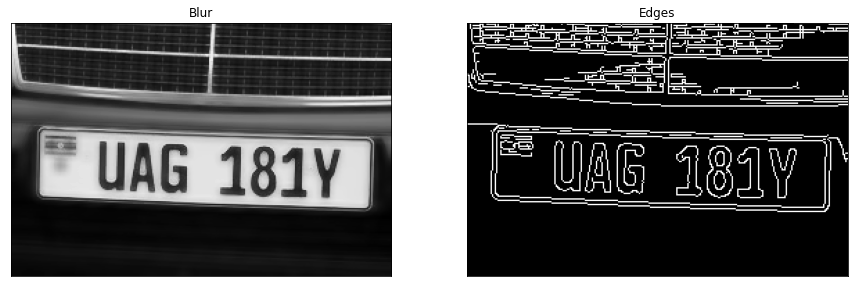

In [150]:
plot_images(blur, edges, title1="Blur", title2="Edges")

In [151]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [152]:
image_copy = image.copy()

In [153]:
_ = cv2.drawContours(image_copy, cnts, -1, (255, 0, 255), 2)

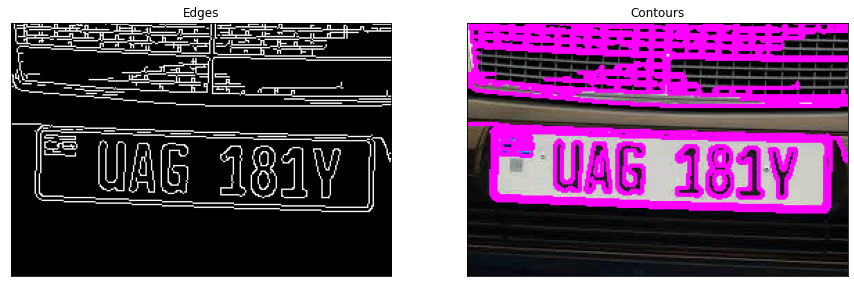

In [154]:
plot_images(edges, image_copy, title1="Edges", title2="Contours")

In [155]:
print(len(cnts))

110


In [156]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:10]

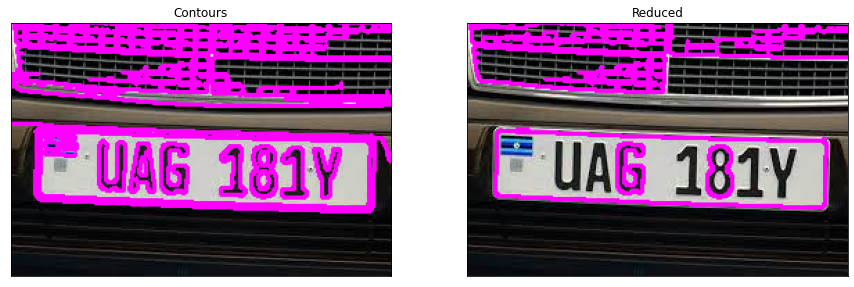

In [157]:
image_reduced_cnts = image.copy()
_ = cv2.drawContours(image_reduced_cnts, cnts, -1, (255, 0, 255), 2)
plot_images(image_copy, image_reduced_cnts, title1="Contours", title2="Reduced")

In [158]:
print(len(cnts))

10


In [159]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break
        
cv2.imwrite('plate.png', plate)

True

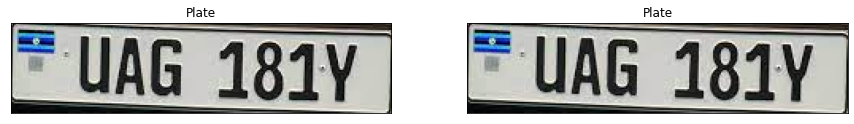

In [160]:
plot_images(plate, plate, title1="Plate", title2="Plate")

In [161]:
#import pytesseract
# text = pytesseract.image_to_string(plate, lang="eng")

# print(text)
reader = easyocr.Reader(['en'])
result = reader.readtext(plate)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[36, 2], [224, 2], [224, 56], [36, 56]], 'uAG 181Y', 0.3308301948706068)]

In [162]:
#text = result[0][-2]
text = result[0][-2]
text.upper()

'UAG 181Y'